#### We import the modules

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import xml.etree.ElementTree as ET
import operator
import pandas as pd
from functools import reduce
import re
import pandas as pd
from typing import Counter
import collections

# Directory path
root_path = os.path.abspath('')

# xml file path
file_xml = os.path.join(root_path, '../datasets/posts.xml')

# Read posts.xml file
tree = ET.parse(file_xml)
root = tree.getroot()

In [4]:
def chunckify(iterable, len_of_chunk):
    for i in range(0, len(iterable), len_of_chunk):
        yield iterable[i:i + len_of_chunk]


### Top 10 least viewed posts

##### Extract the visits for each post

In [5]:
def least_viewed(data):
    # Id de cada post
    post_id = data.attrib['Id']
    # Cuenta de las vistas
    view_count = data.attrib['ViewCount']
    dictionary = {post_id: int(view_count)}
    return dictionary

##### Remove posts that have no visits "0"

In [6]:
def reduce_items(data1, data2):
    for key, value in data2.items():
        if value != 0:
            data1.update(data2)
        elif 0 in data1.values():
            data1.popitem()
    return data1

##### Returns the top 10 with the fewest visits, as a dictionary with id as key, and visits as value

In [7]:
def top10_least_viewed(data):
    s = sorted(data.items(), key=operator.itemgetter(1), reverse=False)
    d = []
    for i in range(10):
        d.append(s[i])
    return dict(d)


Define the extraction and reduction process for each data chunk

In [8]:
def mapper(data):
    post_viewd = list(map(least_viewed, data))
    reducing = reduce(reduce_items, post_viewd)
    return reducing

In [9]:
data_chunks = chunckify(root,50)

mapped = list(map(mapper, data_chunks))
reduce_mapped = reduce(reduce_items, mapped)

top10 = top10_least_viewed(reduce_mapped)

In [46]:
df = pd.DataFrame(top10.items(), columns=['Posts_id', 'Visitas'])
df

,Posts_id,Visitas
0,617,1
1,59881,5
2,58985,7
3,60468,7
4,20024,8
5,62483,8
6,66002,8
7,55746,9
8,62204,9
9,63096,9


<AxesSubplot: xlabel='Visitas', ylabel='Posts_id'>

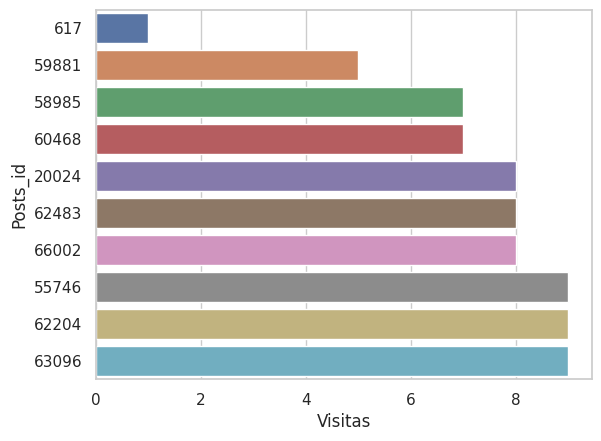

In [49]:
posts= df.Posts_id
visitas = df.Visitas

sns.barplot(x=visitas, y=posts)